In [ ]:
%load_ext autoreload
%autoreload 2

In [38]:
# your function must import layout and constants
# this is structured to work both in Jupyter notebook and from the command line
try:
    from . import layout
    from . import constants
except ImportError:
    import layout
    import constants
    
from pathlib import Path
from io import BytesIO
import base64


In [298]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sparkline(data):
    '''convert dictionary of list of two-tuples into multiple sparkline graphs
    
    Args:
        data(`dict`): {'key'[[v1, v2], [v1, v2]...], 'key2': [[v1, v2]]}'''
    
    
    # TO DO: 
    # - [ ] set figsize -- this should match the block ratio in the layout to ensure proper scaling
    
    
    for key in data.keys():
        # cull just the 1th value from each pair
        x = [i[1] for i in data[key]]
        # calculate the mean for the set
        mean = np.mean(x)
        
        # plot the data
        fig, ax = plt.subplots(1, 1, figsize=(10,3))
        plt.plot(x, color='k', linewidth=1)
        
        # add a marker to the last value
        plt.plot(len(x)-1, x[len(x)-1], color='r', marker='.')

        # Remove the Y axis
        for k,v in ax.spines.items():
            v.set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # add the mean value line (blue, width 2, style -.-.-)
        ax.axhline(y=mean, c='b', linewidth=2, linestyle='-.')
        
        
        print(key)
        plt.show()
        plt.close()

    # Save the resulting bmp file to the images directory
#     plt.savefig(os.path.join(picdir, key+'spark.png'), dpi=72)
#     plt.close('all') # Close plot to prevent memory error

In [314]:
r = requests.get("https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=180&interval=hourly")

prices


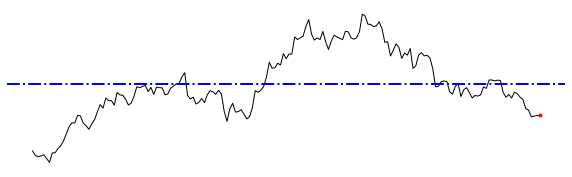

market_caps


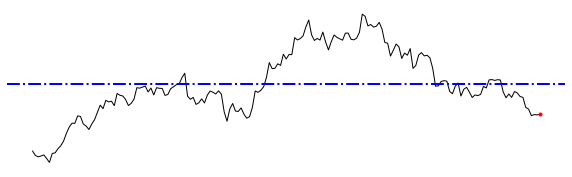

total_volumes


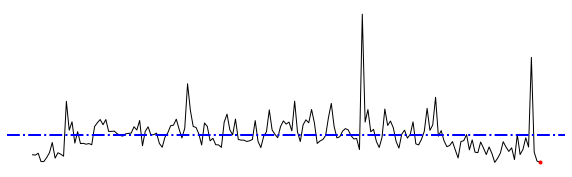

In [315]:
allprices = r.json()
sparkline(data=allprices)

In [ ]:
# make sure this function can accept *args and **kwargs even if you don't intend to use them
def update_function(self, *args, **kwargs):
    '''update function for crypto plugin
    
    
    %U'''   
    
    is_updated = False
    data = {}
    priority = 2**15
    
    
    
    
    return (is_updated, data, priority)

In [ ]:
from library import SelfDummy


In [ ]:
s = SelfDummy()

In [ ]:
!jupyter-nbconvert --to python --template python_clean demo_plugin.ipynb

In [ ]:
# Jupyter notebook magic to create a symbolic to the library directory
# this will allow you to import the Plugin() module 
!ln -s ../../library ./


In [ ]:
logging.root.setLevel('DEBUG')
from library.CacheFiles import CacheFiles
def test_plugin():
    '''This code snip is useful for testing a plugin from within Jupyter Notebook'''
    from library import Plugin
    from IPython.display import display
    # this is set by PaperPi based on the configured schreen
    test_plugin = Plugin(resolution=(1200, 800))
    # this is pulled from the configuration file; the appropriate section is passed
    # to this plugin by PaperPi during initial configuration
    test_plugin.config = {}
    test_plugin.layout = layout.layout
    # this is done automatically by PaperPi when loading the plugin
    test_plugin.cache = CacheFiles()
    test_plugin.update_function = update_function
    test_plugin.update()
    display(test_plugin.image)
    return test_plugin
my_plugin = test_plugin

In [ ]:
# from library.CacheFiles import CacheFiles
# def test_plugin():
#     '''This code snip is useful for testing a plugin from within Jupyter Notebook'''
#     from library import Plugin
#     from IPython.display import display
#     # this is set by PaperPi based on the configured schreen
#     test_plugin = Plugin(resolution=(1200, 800))
#     # this is pulled from the configuration file; the appropriate section is passed
#     # to this plugin by PaperPi during initial configuration
#     test_plugin.config = {'your_name': 'Aaron', 'favorite_color': 'pink'}
#     test_plugin.layout = layout.layout
#     # this is done automatically by PaperPi when loading the plugin
#     test_plugin.cache = CacheFiles()
#     test_plugin.update_function = update_function
#     test_plugin.update()
#     display(test_plugin.image)
#     return test_plugin
# my_plugin = test_plugin

In [ ]:
# this simulates calling the plugin from PaperPi
# my_plugin()